### KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
# 데이터 생성
n_sample = 300
n_clusters = 3

In [4]:
x, y = make_blobs(n_samples=n_sample, centers= n_clusters, random_state=42)

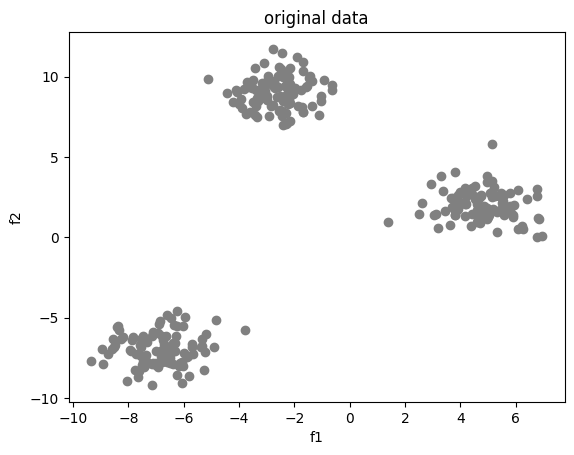

In [10]:
# 그래프 
plt.scatter(x[:, 0], x[:, 1], c='gray', label='original data')
plt.title('original data')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [26]:
# KMeans 객체 생성 -> 학습
Kmeans = KMeans(n_clusters=3, random_state=42)

In [27]:
# 학습
cluster_labels = Kmeans.fit_predict(x)

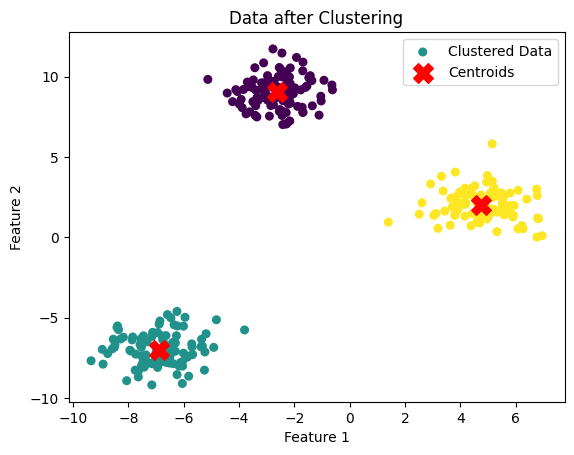

In [28]:
# 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=30, label="Clustered Data")

# 클러스터  중심  시각화
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

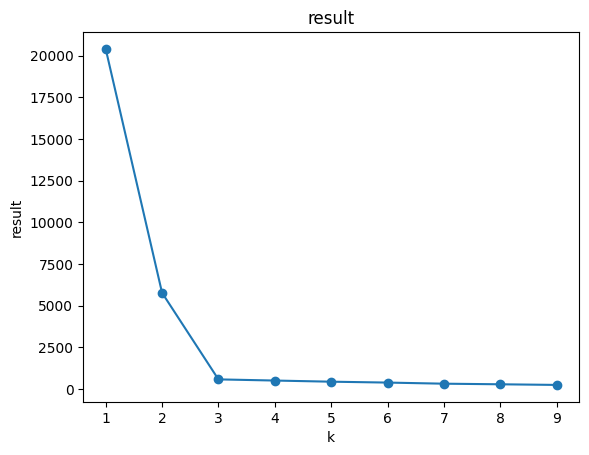

In [29]:
# 최적의 K 값 찾기
result = []

for k in range(1, 10):
    Kmeans_temp = KMeans(n_clusters=k, random_state=42)
    Kmeans_temp.fit_predict(x)
    result.append(Kmeans_temp.inertia_)

plt.plot(range(1, 10), result, marker='o')
plt.title('result')

plt.xlabel('k')
plt.ylabel('result')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [34]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8480303059596955


In [35]:
# 시각화를 위한 점수 계산
sil_values = silhouette_samples(x, cluster_labels)
print(sil_values)

[0.90593228 0.90295138 0.78292932 0.82801009 0.85347199 0.87164904
 0.87660124 0.87599826 0.87967189 0.85542272 0.8185558  0.87259676
 0.74387596 0.84157115 0.90743902 0.87272287 0.87580064 0.72626456
 0.86269038 0.78265318 0.78367684 0.88236857 0.86744598 0.91367619
 0.87177917 0.84973102 0.88991326 0.69411153 0.86247358 0.84701361
 0.85559028 0.86435444 0.88923506 0.81530708 0.84205606 0.84407722
 0.89049865 0.87854612 0.90341598 0.76522292 0.84764565 0.8725714
 0.91062018 0.81940318 0.8287758  0.82800398 0.91293113 0.86613733
 0.9101851  0.81830486 0.87279139 0.85655332 0.90111562 0.76870605
 0.87629642 0.52748913 0.90894375 0.83452366 0.86343982 0.86125249
 0.88918749 0.76979529 0.86487455 0.69836723 0.88372903 0.82959834
 0.85491415 0.88631591 0.8734638  0.86485178 0.85190407 0.85010535
 0.90260065 0.86305493 0.80711153 0.90990924 0.85777116 0.85024895
 0.87568057 0.85626803 0.86869093 0.86376756 0.89694868 0.85592685
 0.86287428 0.88174667 0.87343813 0.75129446 0.81999592 0.82172

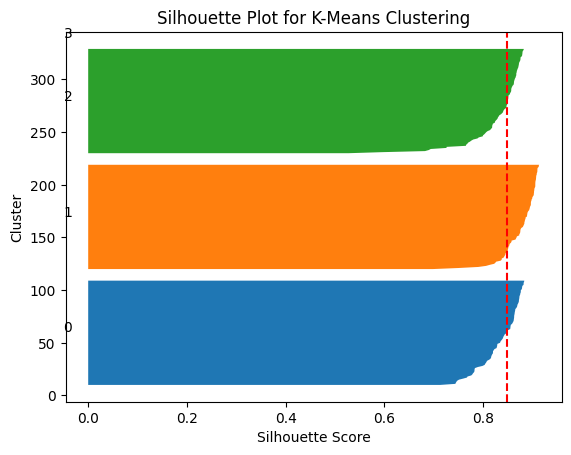

In [43]:
# 시각화 준비
y_lower = 10
for i in range(4): 
    ith_cluster_silhouette_values = sil_values[cluster_labels == i] 
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, 
                      ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # 클러스터 번호 표시

    y_lower = y_upper + 10  # 다음 클러스터로 y위치 이동 (← 반드시 반복문 안에 있어야 함)

# 그래프 설정
plt.axvline(x=sil_avg, color="red", linestyle="--")  # 평균 실루엣 점수 선
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [51]:
iris = load_iris()

x = iris.data
y = iris.target

In [52]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
pca = PCA(n_components=2)

In [54]:
x_pca = pca.fit_transform(x_scaled)

In [56]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


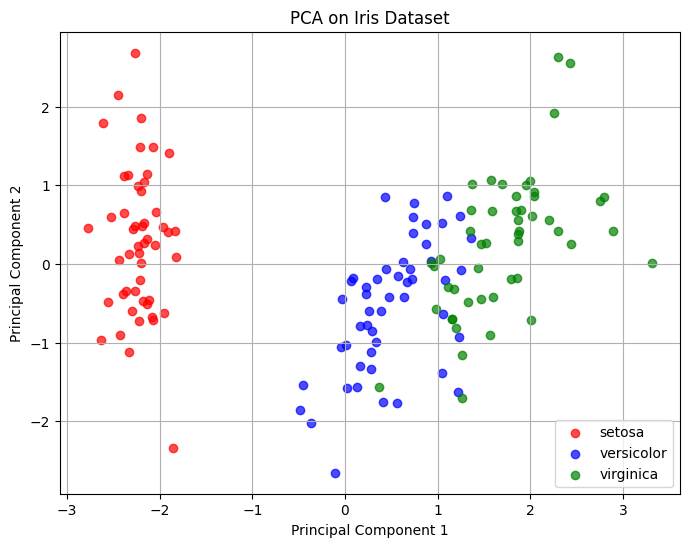

In [73]:
# 5. PCA 결과  시각화
# - 두  개의  주성분을  사용해  데이터를  2D 플롯으로  시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0],  # 첫 번째 주성분
                x_pca[y == target, 1],  # 두 번째 주성분
                color=color, label=label, alpha=0.7)
plt.title('PCA on Iris Dataset') 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2') 
plt.legend()
plt.grid()
plt.show()

In [74]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [75]:
np.random.seed(42)

In [92]:
# 정사 100개, 이상 10개
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
#print(normal_traffic)
ano_traffic = np.random.uniform(low=100, high=150, size=(10,2))
print(ano_traffic)

[[146.72165194 134.45438269]
 [141.16366063 127.80953463]
 [138.97583507 100.81001987]
 [140.91902124 102.00694295]
 [144.49566882 149.59813736]
 [114.70337311 110.51592781]
 [138.26816819 112.65131705]
 [143.27811916 105.14212961]
 [106.29775982 148.95757776]
 [133.69194491 142.34436122]]


In [95]:
traffic_data = np.vstack((normal_traffic, ano_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count', 'Response Time'])

In [97]:
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

In [99]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [100]:
traffic_df

,Request Count,Response Time,Anomaly Score
0,30.921924,41.396150,1
1,45.863945,68.876877,1
2,55.565531,36.645184,1
3,54.860363,34.526960,1
4,60.826911,45.288753,1
...,...,...,...
105,114.703373,110.515928,-1
106,138.268168,112.651317,-1
107,143.278119,105.142130,-1
108,106.297760,148.957578,-1


In [104]:
traffic_df['Request Count'].min()
traffic_df['Request Count'].max()

np.float64(146.72165193767208)

In [ ]:
# github 연동